# Homework of Week 1

In [95]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable
from scipy.integrate import solve_ivp

In [96]:
%config InlineBackend.figure_format = 'svg'

## Helper Functions

In [97]:
def plotVector(vv: np.ndarray, title: str, R: float = 0.99):
    # Create a meshgrid with angular variables
    u, v = np.meshgrid(np.linspace(0, 2 * np.pi, 30), np.linspace(0, np.pi, 20))

    # Convert spherical coordinates to Cartesian
    x = R * np.cos(u) * np.sin(v)
    y = R * np.sin(u) * np.sin(v)
    z = R * np.cos(v)

    # Create 3D figure
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Plot wireframe
    ax.plot_surface(x, y, z, color='b', alpha=0.05)
    ax.plot_wireframe(x, y, z, color='b', alpha=0.05)

    # Get vector coordinates
    vx = vv[0, :]
    vy = vv[1, :]
    vz = vv[2, :]

    # Now we can visualize the evolution of the magnetic polarization by plotting the polar and azimuthal angles over time
    ax.plot(vx, vy, vz, color='g')
    ax.quiver(0, 0, 0, vx[0], vy[0], vz[0], color='b')
    ax.quiver(0, 0, 0, vx[-1], vy[-1], vz[-1], color='r')

    # Labeling
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.title(title)
    plt.show()

    return

In [98]:
# Python function that converts from cartesian to spherical coordinates:
def carToSph(x: float, y: float, z: float) -> tuple[float, float, float]:
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan2(y, x)
    return r, theta, phi

# Python function that converts from spherical to cartesian coordinates:
def sphToCar(r: float, theta: float, phi: float) -> tuple[float, float, float]:
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

In [99]:
def histogram(dd: np.ndarray, xx: tuple[float, float] = (-1.1, 1.1), bins: int = 30) -> None:
    if xx:
        plt.hist(dd, bins=bins, color='blue', alpha=0.5, range = (xx[0], xx[1]))
    
    else:
        plt.hist(dd, bins=bins, color='blue', alpha=0.5)
    
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Histogram of Time Series")
    plt.show()

    return

In [100]:
# Classic Observable
def obsClassical(mz: np.ndarray, eps: float = 0.0) -> np.ndarray:
    return mz + eps * np.random.normal(0, 1, len(mz))


# Quantum Observable
def obsQuantum(bz: np.ndarray, eps: float = 0.0) -> np.ndarray:
    # Measurement Probability
    p = 0.5 * (1 - bz)

    # Error probability
    f = (eps / 2)**2
    
    # Measurements
    mz = np.ones_like(bz)
    x = np.random.uniform(0, 1, len(mz))
    ind = np.where(x<p)
    mz[ind] = -1

    # Errors
    x = np.random.uniform(0, 1, len(mz))
    ind = np.where(x<f)
    mz[ind] = -mz[ind]

    return mz

In [101]:
# Get a heat map of the distribution over time
def heatMap(data: np.ndarray, ddLim: tuple[float, float] = (-1, 1), binWidth: float = 0.002) -> None:
    
    # Compute the distribution and mean for each time-step in the data
    means = []
    distributions = []
    for i in range(len(data[0, :])):
        means.append(np.mean(data[:, i]))

        hist, bin_edges = np.histogram(data[:, i], range = ddLim, bins = np.arange(ddLim[0], ddLim[1] + binWidth, binWidth), density=True)
        distributions.append(hist)

    # Convert to arrays
    means = np.array(means)
    distributions = np.array(distributions)

    # Make the plot
    fig, ax = plt.subplots()
    im = ax.imshow(distributions, cmap='hot', extent=[-1, 1, 0, 1], vmin=0, vmax=1)

    # Plotting the line based on the values in the means list
    times = 1 - np.arange(len(means))/len(means)
    ax.plot(means, times, 'g-')

    # Display the plot
    plt.colorbar(im)
    plt.show()

    return

# Exercise 1

We adapt the `solve_ivp` function to solve the desired ODE.

In [102]:
def solver(matrix: Callable, ti: float, tf: float, dt: float, mi: np.ndarray):
    return solve_ivp(lambda t, m: matrix(m, t) @ m, (ti, tf), mi, method='RK45', t_eval=np.arange(ti, tf, dt))

# Exercise 2


## Classical Case
For simplicity we will consider $\textbf H = H\textbf e_z$ hence we have that:

$$
\begin{align*}

\frac{d\mathbf{m}}{dt} &= -\gamma \mathbf{m}\times \mathbf{H} - \lambda \mathbf{m}\times\left[\mathbf{m}\times\mathbf{H}\right]- \eta \left(\mathbf{m}-\mathbf{m_0}\right)
\\\\

&= -\gamma (-m_x H \textbf e_y + m_y H \textbf e_x) - \lambda \mathbf{m}\times(-m_x H \textbf e_y + m_y H \textbf e_x) - \eta [(m_x-(m_0)_x)\textbf e_x + (m_y-(m_0)_y)\textbf e_y + (m_z-(m_0)_z)\textbf e_z]
\\\\

&= \gamma (m_x H \textbf e_y - m_y H \textbf e_x) - \lambda [m_x m_z H\textbf e_x + m_y m_z H \textbf e_y - (m_x^2 H + m_y^2 H)\textbf e_z] - \eta [(m_x-(m_0)_x)\textbf e_x + (m_y-(m_0)_y)\textbf e_y + (m_z-(m_0)_z)\textbf e_z]

\end{align*}
$$

This corresponds to the following matrix equation:
$$
\begin{align*}

\frac{d}{dt}\begin{pmatrix}
m_x
\\\\

m_y
\\\\

m_z
\end{pmatrix} &= 
\begin{pmatrix}
-\eta\left(1-\frac{(m_0)_x}{m_x}\right) & -\gamma H & -\lambda H \cdot m_x
\\[0.2cm]

\gamma H & -\eta\left(1-\frac{(m_0)_y}{m_y}\right) & -\lambda H \cdot m_y
\\[0.2cm]

\lambda H \cdot m_x & \lambda H \cdot m_y & -\eta\left(1-\frac{(m_0)_z}{m_z}\right)
\end{pmatrix}
\begin{pmatrix}
m_x
\\\\

m_y
\\\\

m_z
\end{pmatrix}

\end{align*}
$$

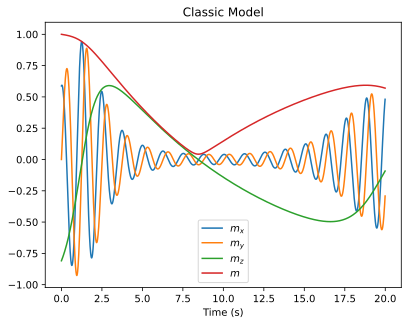

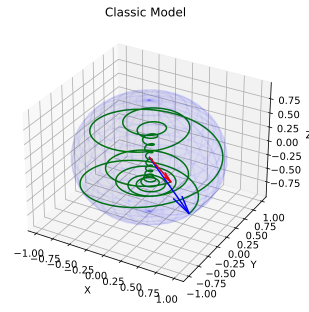

Blue Arrow: Initial State
Red Arrow: Final State


In [103]:
# Testing to see if we get expected results

# Parameters
mi = np.array(sphToCar(1, 0.8 * np.pi, 0))
m0 = np.array([0, 0, -1.0])
Hz = 1
lam = 1.0
eta = 0.1
gam = 5.0

# Simulation Time
ti = 0
tf = 20.0
dt = 0.01


# Define the matrix M for the system of ODEs
def matrixClassic(m: np.ndarray, t: float) -> np.ndarray:
    # Make sure we don't divide by zero
    matrix = np.zeros((3, 3))

    # First column of the matrix does something
    if m[0] != 0:
        matrix += np.array([
            [-eta * (1 - m0[0] / m[0]), 0, 0],
            [gam * Hz, 0, 0],
            [lam * Hz * m[0], 0, 0]
        ])
    
    if m[1] != 0:
        matrix += np.array([
            [0, -gam * Hz, 0],
            [0, -eta * (1 - m0[1] / m[1]), 0],
            [0, lam * Hz * m[1], 0]
        ])
    
    if m[2] != 0:
        matrix += np.array([
            [0, 0, -lam * Hz * m[0]],
            [0, 0, -lam * Hz * m[1]],
            [0, 0, -eta * (1 - m0[2] / m[2])]
        ])
    
    return matrix
    
# Solve the system of ODEs using our solver
sol = solver(matrixClassic, ti, tf, dt, mi)

tt = sol.t
mm = sol.y

# Plot the solution
plt.title("Classic Model")
plt.plot(tt, mm[0, :], label='$m_x$')
plt.plot(tt, mm[1, :], label='$m_y$')
plt.plot(tt, mm[2, :], label='$m_z$')
plt.plot(tt, np.sqrt(mm[0, :]**2 + mm[1, :]**2 + mm[2, :]**2), label='$m$')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# View in space
plotVector(mm, "Classic Model")
print("Blue Arrow: Initial State")
print("Red Arrow: Final State")

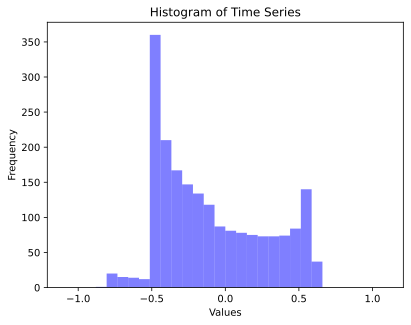

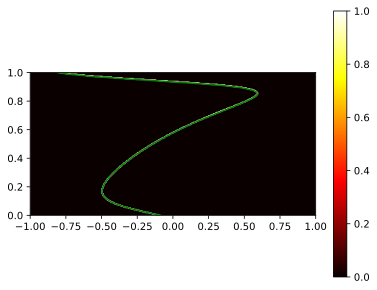

In [104]:
# Polar angle of the magnetic moment produced by the source 
theta = 0.8 * np.pi

# Number of experimentes conducted
n =  100

# Measurement noise
epsilon = 0

# Run many trials (using parameters from above!)
resClassical = []
mi = np.array(sphToCar(1, theta, 0))
for _ in range(n):
    sol = solver(matrixClassic, ti, tf, dt, mi)
    mzClassical = obsClassical(sol.y[2, :], epsilon)
    resClassical.append(mzClassical)

resClassical = np.array(resClassical)


# Measurements at the end
histogram(resClassical[-1])

# Make the heat map
heatMap(resClassical)

## Quantum Case

For the quantum case we use the Maxwell-Bloch equations for the Bloch vector of the two-level system:

$$
\begin{align*}

\frac{db_x}{dt} &= -\frac{\Gamma}{2} b_x - \Delta b_y
\\\\

\frac{db_y}{dt} &= -\frac{\Gamma}{2} b_y +  \Delta b_x - g b_z
\\\\

\frac{db_z}{dt} &= -\Gamma(b_z + 1)  + g b_y

\end{align*}
$$


This corresponds to the following matrix equation:
$$
\begin{align*}

\frac{d}{dt}\begin{pmatrix}
b_x
\\\\

b_y
\\\\

b_z
\end{pmatrix} &= 
\begin{pmatrix}
-\frac{\Gamma}{2} & - \Delta & 0
\\\\

\Delta & -\frac{\Gamma}{2} & -g
\\\\

0 & g & -\Gamma(1+b_z^{-1})
\end{pmatrix}
\begin{pmatrix}
b_x
\\\\

b_y
\\\\

b_z
\end{pmatrix}

\end{align*}

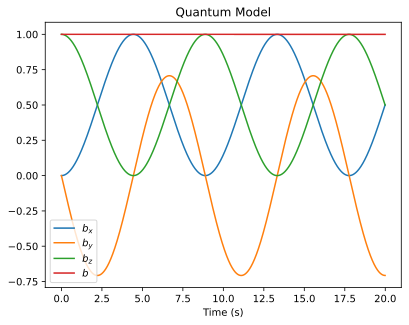

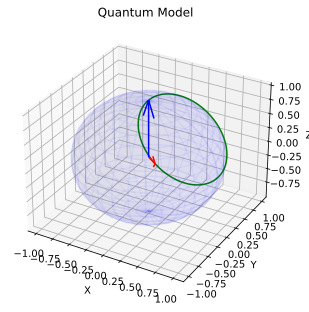

In [105]:
# Testing to see if we get expected results

# Parameters
bi = np.array([0.0, 0.0, 1.0])
gamma = 0.0
delta = 0.1 * gam
gpara = 0.5

# Simulation Time
ti = 0
tf = 20.0
dt = 0.01

# Define the matrix M for the system of ODEs
def matrixQuantum(b: np.ndarray, t: float) -> np.ndarray:
    if b[2] != 0:
        return np.array([
            [-gamma/2, -delta, 0],
            [delta, -gamma/2, -gpara],
            [0, gpara, -gamma * (1 + 1/b[2])]
        ])

    else:
        return np.array([
            [-gamma/2, -delta, 0],
            [delta, -gamma/2, 0],
            [0, gpara, 0]
        ])
    
# Solve the system of ODEs using our solver
sol = solver(matrixQuantum, ti, tf, dt, bi)

tt = sol.t
bb = sol.y

# Plot the solution
plt.title("Quantum Model")
plt.plot(tt, bb[0, :], label='$b_x$')
plt.plot(tt, bb[1, :], label='$b_y$')
plt.plot(tt, bb[2, :], label='$b_z$')
plt.plot(tt, np.sqrt(bb[0, :]**2 + bb[1, :]**2 + bb[2, :]**2), label='$b$')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# View in space
plotVector(bb, "Quantum Model")

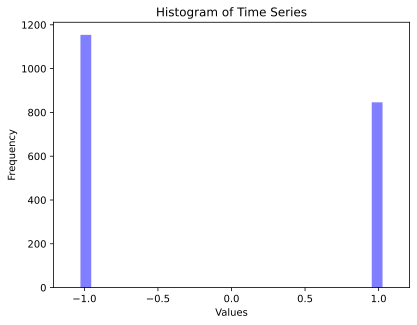

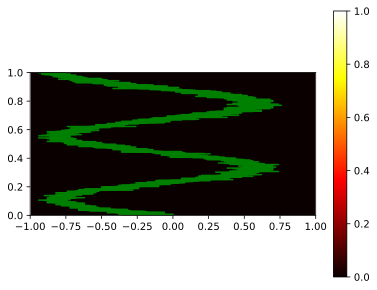

In [106]:
# Polar angle of the magnetic moment produced by the source 
theta = 0.8 * np.pi

# Number of experimentes conducted
n =  100

# Measurement noise
epsilon = 0

# Run many trials (using parameters from above!)
resQuantum = []
bi = np.array(sphToCar(1, theta, 0))
for _ in range(n):
    sol = solver(matrixQuantum, ti, tf, dt, bi)
    mzQuantum = obsQuantum(sol.y[2, :], epsilon)
    resQuantum.append(mzQuantum)

resQuantum = np.array(resQuantum)


# Measurements at the end
histogram(resQuantum[-1], xx = (-1.1, 1.1))

# Make the heat map
heatMap(resQuantum)

# Exercise 3

## Classical Case

We define $C(H)$ as the classical matrix that we had above:


$$
C(H) = \begin{pmatrix}
-\eta\left(1-\frac{(m_0)_x}{m_x}\right) & -\gamma H & -\lambda H \cdot m_x
\\[0.2cm]

\gamma H & -\eta\left(1-\frac{(m_0)_y}{m_y}\right) & -\lambda H \cdot m_y
\\[0.2cm]

\lambda H \cdot m_x & \lambda H \cdot m_y & -\eta\left(1-\frac{(m_0)_z}{m_z}\right)
\end{pmatrix}
\\\\ \
$$


If the two particles did not interact then we would have a time evolution of the following form:
$$
\frac{d}{dt}
\begin{pmatrix}
\textbf m_1
\\\\

\textbf m_2
\end{pmatrix}
=
\begin{pmatrix}
C(H_1) & \textbf 0
\\\\

\textbf 0 & C(H_2)
\end{pmatrix}
\begin{pmatrix}
\textbf m_1
\\\\

\textbf m_2
\end{pmatrix}
$$

Modeling the interaction in the desired form is therefore very easy:
$$
\frac{d}{dt}
\begin{pmatrix}
\textbf m_1
\\\\

\textbf m_2
\end{pmatrix}
=
\begin{pmatrix}
C(H_{1, \text{ext}} + v_1(m_{2})_z) & \textbf 0
\\\\

\textbf 0 & C(H_{2, \text{ext}} + v_2(m_{1})_z)
\end{pmatrix}
\begin{pmatrix}
\textbf m_1
\\\\

\textbf m_2
\end{pmatrix}
$$

## Quantum Case

For the quantum case, such a simple extension of the one-particle model is not possible, because:
- These equations are obtained from the Rabi model, which is described by the following Hamiltonian (where $H_A$ is the two-level Hamiltonian that models an atom):
    $$
    \begin{align*}

    H &= H_A -\textbf d \cdot E \cos(\omega t) \cdot \hat{\varepsilon}

    \end{align*}
    $$

- In analysis we did we adapted this model from an electric charge-based system to a magnetic dipole-based system, hence we can try to generalize the $g$ paramter from the Rabi model to our model:
    $$
    \begin{align*}

    g \propto E \quad\quad\quad\quad g \propto H

    \end{align*}
    $$

- Finally, we have the problem that the Rabi model makes sense if the external field is oscillating, but the interaction between the two fields changes the total magnetic field, not its amplitude of oscillation, hence we can consider meking the following change, knowing it is not completely correct:
    $$
    \begin{align*}

    g \to g + v_i (m_j)_z

    \end{align*}
    $$


This corresponds to the following matrix equation:
$$
\frac{d}{dt}
\begin{pmatrix}
\textbf b_1
\\\\

\textbf b_2
\end{pmatrix}
=
\begin{pmatrix}
Q(g + v_1(b_{2})_z) & \textbf 0
\\\\

\textbf 0 & Q(g+ v_2(b_{1})_z)
\end{pmatrix}
\begin{pmatrix}
\textbf b_1
\\\\

\textbf b_2
\end{pmatrix}
$$

Where:
$$
Q(g) = \begin{pmatrix}
-\frac{\Gamma}{2} & - \Delta & 0
\\\\

\Delta & -\frac{\Gamma}{2} & -g
\\\\

0 & g & -\Gamma(1+b_z^{-1})
\end{pmatrix}
$$

# Exercise 4

## Classic Case

We can see the effects of the coupling by setting $v_1 = v_2 > H_1 = H_2$ and $\eta = 0$, allowing us to we see that: 
- With $v_1 = v_2 = 1$ the $m_z$ component of both particles in the final state is the same.
- With $v_1 = v_2 = -1$ the $m_z$ component of both particles in the final state is the opposite.

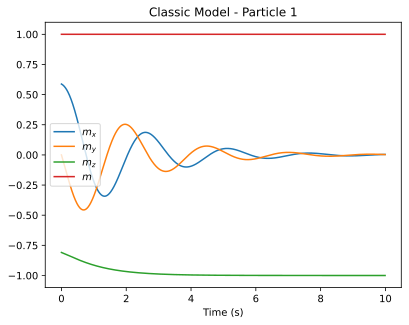

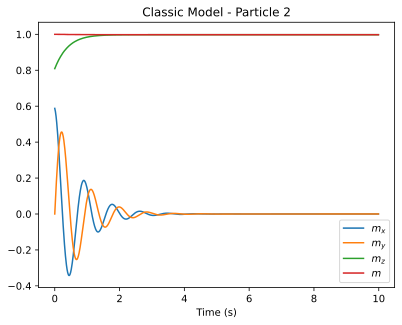

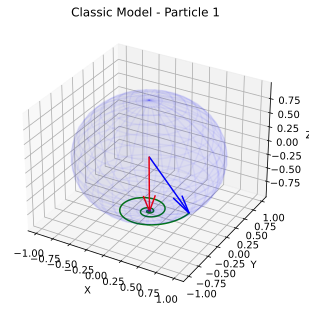

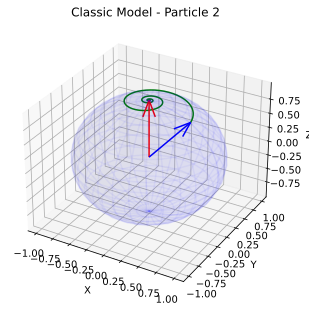

In [107]:
# Testing to see if we get expected results

# Parameters
mi1 = list(sphToCar(1, 0.8 * np.pi, 0))
mi2 = list(sphToCar(1, 0.2 * np.pi, 0))

mi = np.array(mi1 + mi2)
m0 = np.array([0, 0, -1.0, 0, 0, -1.0])

Hz1 = 0.5
Hz2 = 0.5

lam = 1.0
eta = 0.0
gam = 5.0

# Coupling
v1 = -1
v2 = -1

# Simulation Time
ti = 0
tf = 10.0
dt = 0.01


# Define the matrix M for one particle
def matrixClassic1(m: np.ndarray, t: float, Hz: float) -> np.ndarray:
    # Make sure we don't divide by zero
    matrix = np.zeros((3, 3))

    # First column of the matrix does something
    if m[0] != 0:
        matrix += np.array([
            [-eta * (1 - m0[0] / m[0]), 0, 0],
            [gam * Hz, 0, 0],
            [lam * Hz * m[0], 0, 0]
        ])
    
    if m[1] != 0:
        matrix += np.array([
            [0, -gam * Hz, 0],
            [0, -eta * (1 - m0[1] / m[1]), 0],
            [0, lam * Hz * m[1], 0]
        ])
    
    if m[2] != 0:
        matrix += np.array([
            [0, 0, -lam * Hz * m[0]],
            [0, 0, -lam * Hz * m[1]],
            [0, 0, -eta * (1 - m0[2] / m[2])]
        ])
    
    return matrix


# Define matrix M for two particles
def matrixClassic2(m: np.ndarray, t: float) -> np.ndarray:
    # Create matrix
    matrix = np.zeros((6, 6))

    # First Block
    matrix[:3, :3] = matrixClassic1(m[:3], t, Hz1 + v1 * m[5])
    
    # Second Block
    matrix[3:, 3:] = matrixClassic1(m[3:], t, Hz2 + v1 * m[2])

    return matrix


# Solve the system of ODEs using our solver
sol = solver(matrixClassic2, ti, tf, dt, mi)

tt = sol.t
mm = sol.y

# Plot the solution
plt.title("Classic Model - Particle 1")
plt.plot(tt, mm[0, :], label='$m_x$')
plt.plot(tt, mm[1, :], label='$m_y$')
plt.plot(tt, mm[2, :], label='$m_z$')
plt.plot(tt, np.sqrt(mm[0, :]**2 + mm[1, :]**2 + mm[2, :]**2), label='$m$')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

plt.title("Classic Model - Particle 2")
plt.plot(tt, mm[3, :], label='$m_x$')
plt.plot(tt, mm[4, :], label='$m_y$')
plt.plot(tt, mm[5, :], label='$m_z$')
plt.plot(tt, np.sqrt(mm[3, :]**2 + mm[4, :]**2 + mm[5, :]**2), label='$m$')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# View in space
plotVector(mm[:3], "Classic Model - Particle 1")
plotVector(mm[3:], "Classic Model - Particle 2")

## Quantum Case

In this case the effect of the coupling is a bit harder to explain, but we see that for both positive and negative coupling the $m_z$ moment of both particles has oppostve sign most of the time!

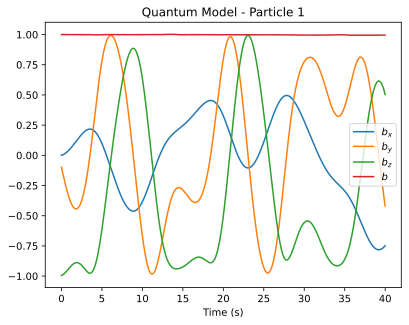

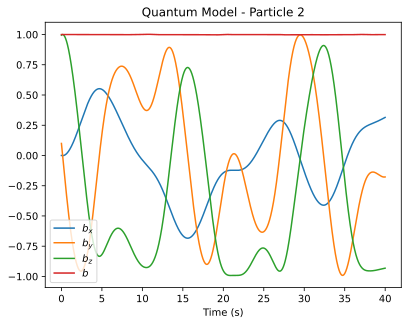

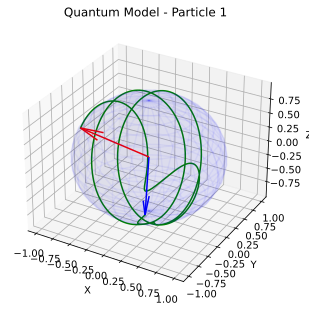

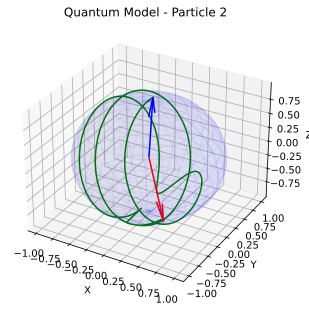

In [108]:
# Testing to see if we get expected results

# Initial State
bi2 = np.array([0.0, 0.1, 1.0])
bi1 = np.array([0.0, -0.1, -1.0])

bi1 /= np.sqrt(np.sum(bi1**2))
bi2 /= np.sqrt(np.sum(bi2**2))

bi = np.array(list(bi1) + list(bi2))

# Parameters
gamma = 0.0
delta = 0.2

gpara1 = 0.2
gpara2 = 0.2

# Coupling
v1 = -0.5
v2 = -0.5

# Simulation Time
ti = 0
tf = 40.0
dt = 0.01

# Define the matrix M for one particle
def matrixQuantum1(b: np.ndarray, t: float, gpara: float) -> np.ndarray:
    if b[2] != 0:
        return np.array([
            [-gamma/2, -delta, 0],
            [delta, -gamma/2, -gpara],
            [0, gpara, -gamma * (1 + 1/b[2])]
        ])

    else:
        return np.array([
            [-gamma/2, -delta, 0],
            [delta, -gamma/2, 0],
            [0, gpara, 0]
        ])


# Define matrix M for two particles
def matrixQuantum2(m: np.ndarray, t: float) -> np.ndarray:
    # Create matrix
    matrix = np.zeros((6, 6))

    # First Block
    matrix[:3, :3] = matrixQuantum1(m[:3], t, gpara1 + v1 * m[5])
    
    # Second Block
    matrix[3:, 3:] = matrixQuantum1(m[3:], t, gpara2 + v2 * m[2])

    return matrix

    
# Define the matrix M for two particles
sol = solver(matrixQuantum2, ti, tf, dt, bi)

tt = sol.t
bb = sol.y

# Plot the solution
plt.title("Quantum Model - Particle 1")
plt.plot(tt, bb[0, :], label='$b_x$')
plt.plot(tt, bb[1, :], label='$b_y$')
plt.plot(tt, bb[2, :], label='$b_z$')
plt.plot(tt, np.sqrt(bb[0, :]**2 + bb[1, :]**2 + bb[2, :]**2), label='$b$')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

plt.title("Quantum Model - Particle 2")
plt.plot(tt, bb[3, :], label='$b_x$')
plt.plot(tt, bb[4, :], label='$b_y$')
plt.plot(tt, bb[5, :], label='$b_z$')
plt.plot(tt, np.sqrt(bb[3, :]**2 + bb[4, :]**2 + bb[5, :]**2), label='$b$')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# View in space
plotVector(bb[:3], "Quantum Model - Particle 1")
plotVector(bb[3:], "Quantum Model - Particle 2")